In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier


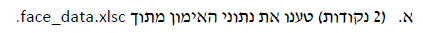

In [3]:
df = pd.read_excel('mat-for-ex4/face_data.xlsx')

In [68]:
M = df.to_numpy()
MT = M.T
X = MT[:-1, 1000:5000]
Y = MT[784, 1000:5000]
Y[Y == -1] = 0
Y = Y.reshape(1, Y.shape[0])

# Transpose X and Y to get the correct shape
X = X.T
Y = Y.T

# One-hot encoding of labels
Y = to_categorical(Y)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

KeyboardInterrupt: 

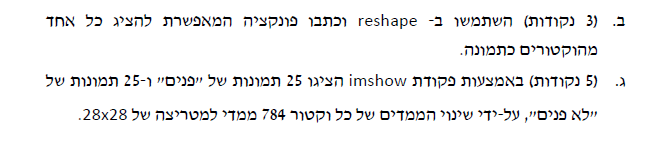

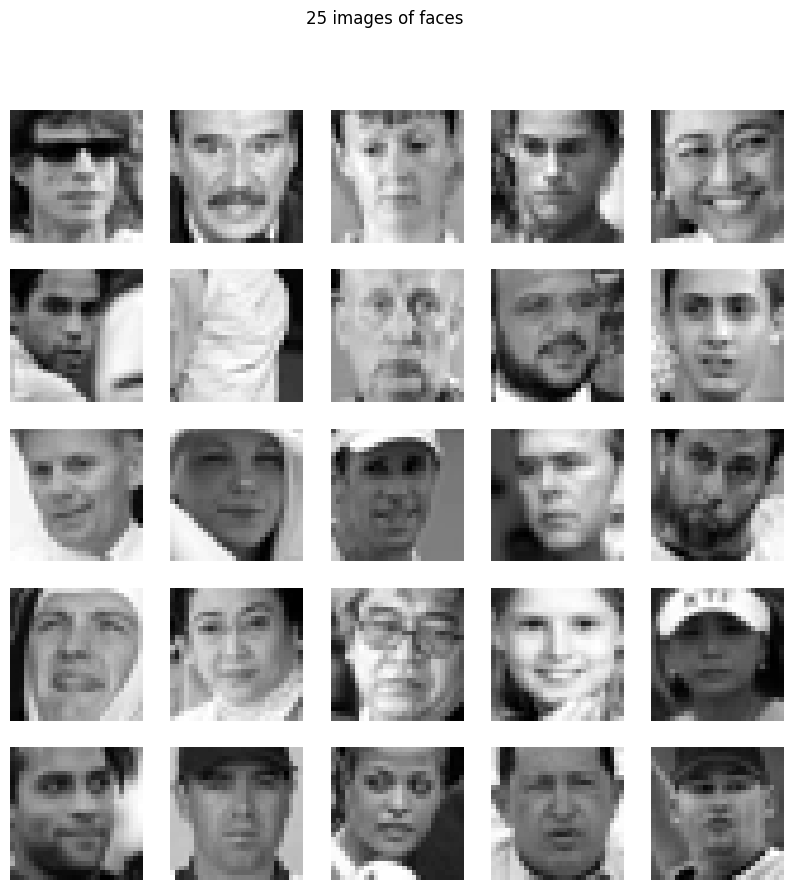

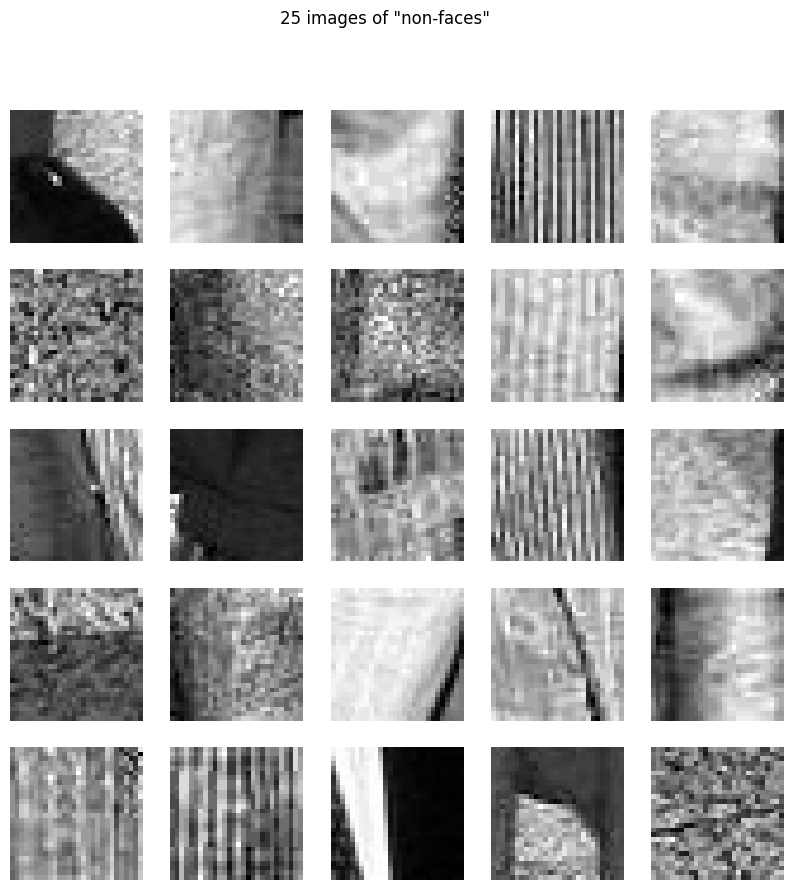

In [5]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('25 images of faces')
face_images = X[Y[:, 1] == 1][:25]
for i, ax in enumerate(axs.flat):
    ax.imshow(face_images[i].reshape(28, 28).T, cmap='gray')
    ax.axis('off')
plt.show()

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('25 images of "non-faces"')
non_face_images = X[Y[:, 0] == 1][:25]
for i, ax in enumerate(axs.flat):
    ax.imshow(non_face_images[i].reshape(28, 28).T, cmap='gray')
    ax.axis('off')
plt.show()


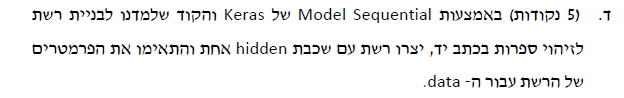

In [6]:
# Function to create the model
def create_model(hidden_units=128, learning_rate=0.01, alpha=0.01):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=784, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Print the model summary
model.summary()


C:\Users\AMIR\ramatgan-window\cop1\Machine_learning\HW\HW4\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,738 (393.51 KB)

 Trainable params: 100,738 (393.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=64,
                    verbose=2)


Epoch 1/15
38/38 - 0s - 4ms/step - accuracy: 0.9079 - loss: 0.3396 - val_accuracy: 0.9167 - val_loss: 0.3280
Epoch 2/15
38/38 - 0s - 3ms/step - accuracy: 0.8758 - loss: 0.3818 - val_accuracy: 0.8767 - val_loss: 0.3584
Epoch 3/15
38/38 - 0s - 4ms/step - accuracy: 0.8988 - loss: 0.3527 - val_accuracy: 0.9050 - val_loss: 0.3359
Epoch 4/15
38/38 - 0s - 3ms/step - accuracy: 0.8692 - loss: 0.3853 - val_accuracy: 0.8933 - val_loss: 0.3480
Epoch 5/15
38/38 - 0s - 3ms/step - accuracy: 0.9029 - loss: 0.3413 - val_accuracy: 0.9400 - val_loss: 0.3047
Epoch 6/15
38/38 - 0s - 3ms/step - accuracy: 0.8888 - loss: 0.3579 - val_accuracy: 0.9333 - val_loss: 0.3109
Epoch 7/15
38/38 - 0s - 2ms/step - accuracy: 0.8554 - loss: 0.4335 - val_accuracy: 0.8117 - val_loss: 0.4559
Epoch 8/15
38/38 - 0s - 2ms/step - accuracy: 0.8954 - loss: 0.3584 - val_accuracy: 0.9050 - val_loss: 0.3477
Epoch 9/15
38/38 - 0s - 3ms/step - accuracy: 0.8804 - loss: 0.3506 - val_accuracy: 0.9333 - val_loss: 0.3038
Epoch 10/15
38/38 -

In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9354 - loss: 0.2967
Test loss: 0.3025274872779846
Test accuracy: 0.9350000023841858


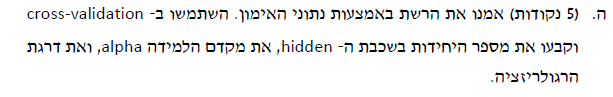

In [15]:
# Wrap the model using the KerasClassifier from scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'model__hidden_units': [64, 128, 256],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__alpha': [0.01, 0.001, 0.0001],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the model
grid_result = grid.fit(X_train, Y_train)

# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {mean:.4f}, Stdev: {stdev:.4f} with: {param}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
# Check the type
print(type(best_model))

# If it's a KerasClassifier, you should access the model attribute
model_instance = best_model.model  # Access the underlying model

# Evaluate the model
loss, accuracy = model_instance.evaluate(X_test, Y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

C:\Users\AMIR\ramatgan-window\cop1\Machine_learning\HW\HW4\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.9486666666666667 using {'batch_size': 32, 'epochs': 20, 'model__alpha': 0.0001, 'model__hidden_units': 64, 'model__learning_rate': 0.001}
Mean: 0.8903, Stdev: 0.0156 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 64, 'model__learning_rate': 0.001}
Mean: 0.8880, Stdev: 0.0198 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 64, 'model__learning_rate': 0.01}
Mean: 0.5490, Stdev: 0.0719 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 64, 'model__learning_rate': 0.1}
Mean: 0.9077, Stdev: 0.0196 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 128, 'model__learning_rate': 0.001}
Mean: 0.7653, Stdev: 0.1329 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 128, 'model__learning_rate': 0.01}
Mean: 0.5290, Stdev: 0.0471 with: {'batch_size': 32, 'epochs': 10, 'model__alpha': 0.01, 'model__hidden_units': 128, 'mod

AttributeError: 'function' object has no attribute 'evaluate'

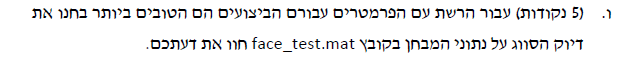

In [47]:
from scipy.io import loadmat
data = loadmat('mat-for-ex4/face_test.mat');

In [93]:
X_test2 = data['Xtest']
Y_test2 = data['ytest']

Y_test2[Y_test2 == -1] = 0

Y_test2 = Y_test2.reshape(1, Y_test2.shape[0])

Y_test2 = Y_test2.T

Y_test2 = to_categorical(Y_test2)


In [95]:
model = create_model(256, .01, 0.0001)

In [96]:
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    verbose=2)


Epoch 1/20
38/38 - 1s - 31ms/step - accuracy: 0.7092 - loss: 0.5764 - val_accuracy: 0.8217 - val_loss: 0.4338
Epoch 2/20
38/38 - 0s - 3ms/step - accuracy: 0.8850 - loss: 0.3307 - val_accuracy: 0.9000 - val_loss: 0.2771
Epoch 3/20
38/38 - 0s - 3ms/step - accuracy: 0.9137 - loss: 0.2608 - val_accuracy: 0.9233 - val_loss: 0.2456
Epoch 4/20
38/38 - 0s - 3ms/step - accuracy: 0.9279 - loss: 0.2297 - val_accuracy: 0.9150 - val_loss: 0.2770
Epoch 5/20
38/38 - 0s - 3ms/step - accuracy: 0.9483 - loss: 0.1926 - val_accuracy: 0.9167 - val_loss: 0.2682
Epoch 6/20
38/38 - 0s - 3ms/step - accuracy: 0.9329 - loss: 0.2186 - val_accuracy: 0.8450 - val_loss: 0.3600
Epoch 7/20
38/38 - 0s - 4ms/step - accuracy: 0.9225 - loss: 0.2390 - val_accuracy: 0.9400 - val_loss: 0.2125
Epoch 8/20
38/38 - 0s - 4ms/step - accuracy: 0.9550 - loss: 0.1751 - val_accuracy: 0.9517 - val_loss: 0.2087
Epoch 9/20
38/38 - 0s - 3ms/step - accuracy: 0.9242 - loss: 0.2361 - val_accuracy: 0.9233 - val_loss: 0.2468
Epoch 10/20
38/38 

In [97]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test2, Y_test2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2137
Test loss: 0.26893556118011475
Test accuracy: 0.9350000023841858


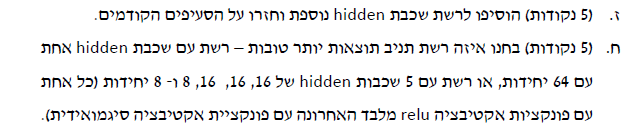

In [98]:
model2 = create_model(64, .01, 0.0001)

In [103]:
history = model2.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    verbose=2)

loss, accuracy = model2.evaluate(X_test2, Y_test2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/20
38/38 - 0s - 4ms/step - accuracy: 0.9613 - loss: 0.1436 - val_accuracy: 0.9600 - val_loss: 0.1754
Epoch 2/20
38/38 - 0s - 2ms/step - accuracy: 0.9646 - loss: 0.1399 - val_accuracy: 0.9417 - val_loss: 0.2076
Epoch 3/20
38/38 - 0s - 3ms/step - accuracy: 0.9679 - loss: 0.1260 - val_accuracy: 0.9500 - val_loss: 0.1987
Epoch 4/20
38/38 - 0s - 3ms/step - accuracy: 0.9571 - loss: 0.1477 - val_accuracy: 0.9200 - val_loss: 0.2685
Epoch 5/20
38/38 - 0s - 3ms/step - accuracy: 0.9733 - loss: 0.1136 - val_accuracy: 0.9450 - val_loss: 0.2043
Epoch 6/20
38/38 - 0s - 2ms/step - accuracy: 0.9413 - loss: 0.1805 - val_accuracy: 0.9283 - val_loss: 0.2525
Epoch 7/20
38/38 - 0s - 3ms/step - accuracy: 0.9508 - loss: 0.1598 - val_accuracy: 0.8650 - val_loss: 0.4076
Epoch 8/20
38/38 - 0s - 3ms/step - accuracy: 0.9404 - loss: 0.1896 - val_accuracy: 0.9583 - val_loss: 0.1910
Epoch 9/20
38/38 - 0s - 3ms/step - accuracy: 0.9567 - loss: 0.1615 - val_accuracy: 0.9600 - val_loss: 0.1806
Epoch 10/20
38/38 -

In [115]:
def create_model_5_layers(hidden_units=8, learning_rate=0.01, alpha=0.01):
    model = Sequential()
    model.add(Dense(hidden_units*2, input_dim=784, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(hidden_units*2, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(hidden_units*2, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(hidden_units, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(hidden_units, activation='relu', kernel_regularizer=l2(alpha)))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [116]:
model3 = create_model_5_layers(8, .01, 0.0001)


In [117]:
history = model3.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    verbose=2)

loss, accuracy = model3.evaluate(X_test2, Y_test2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/20
38/38 - 3s - 75ms/step - accuracy: 0.6846 - loss: 0.5969 - val_accuracy: 0.8417 - val_loss: 0.4542
Epoch 2/20
38/38 - 0s - 3ms/step - accuracy: 0.8596 - loss: 0.3736 - val_accuracy: 0.8783 - val_loss: 0.3008
Epoch 3/20
38/38 - 0s - 2ms/step - accuracy: 0.9042 - loss: 0.2541 - val_accuracy: 0.8817 - val_loss: 0.2783
Epoch 4/20
38/38 - 0s - 2ms/step - accuracy: 0.9150 - loss: 0.2393 - val_accuracy: 0.9167 - val_loss: 0.2249
Epoch 5/20
38/38 - 0s - 2ms/step - accuracy: 0.9450 - loss: 0.1725 - val_accuracy: 0.9483 - val_loss: 0.1671
Epoch 6/20
38/38 - 0s - 2ms/step - accuracy: 0.9383 - loss: 0.1806 - val_accuracy: 0.8983 - val_loss: 0.2603
Epoch 7/20
38/38 - 0s - 2ms/step - accuracy: 0.9575 - loss: 0.1412 - val_accuracy: 0.9550 - val_loss: 0.1669
Epoch 8/20
38/38 - 0s - 2ms/step - accuracy: 0.9308 - loss: 0.1970 - val_accuracy: 0.9017 - val_loss: 0.2618
Epoch 9/20
38/38 - 0s - 3ms/step - accuracy: 0.9542 - loss: 0.1460 - val_accuracy: 0.9533 - val_loss: 0.1653
Epoch 10/20
38/38 

all the result looks like they are close to each other 